# 1. Apply Pretrained OCR

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
import matplotlib.pyplot as plt
import keras_ocr
import os

In [ ]:
# keras-ocr will automatically download pretrained
# weights for the detector and recognizer.
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [ ]:
# read image
list_image = [i for i in os.listdir() if "tif" in i]

In [ ]:
# apply ocr into selected path
images = [keras_ocr.tools.read(path) for path in list_image]

In [ ]:
# Each list of predictions in prediction_groups is a list of
# (word, box) tuples.
%time predictions = pipeline.recognize(images)

CPU times: user 3min 42s, sys: 6.25 s, total: 3min 49s
Wall time: 2min 9s


In [ ]:
predictions

[[('boriston', array([[118.04465 ,  96.75032 ],
          [300.12106 ,  98.05087 ],
          [299.9388  , 123.56386 ],
          [117.8624  , 122.263306]], dtype=float32)),
  ('research', array([[113., 122.],
          [175., 122.],
          [175., 135.],
          [113., 135.]], dtype=float32)),
  ('laboratories', array([[176., 123.],
          [271., 123.],
          [271., 136.],
          [176., 136.]], dtype=float32)),
  ('inc', array([[271., 123.],
          [297., 123.],
          [297., 136.],
          [271., 136.]], dtype=float32)),
  ('t', array([[323., 165.],
          [332., 165.],
          [332., 174.],
          [323., 174.]], dtype=float32)),
  ('t', array([[354., 165.],
          [363., 165.],
          [363., 174.],
          [354., 174.]], dtype=float32)),
  ('rinvoicer', array([[369., 165.],
          [442., 165.],
          [442., 180.],
          [369., 180.]], dtype=float32)),
  ('t', array([[447., 165.],
          [457., 165.],
          [457., 175.],
       

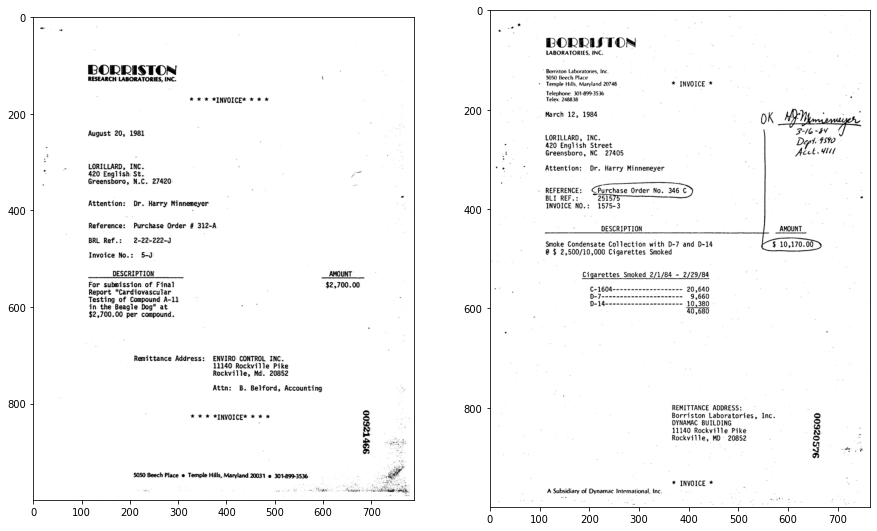

In [ ]:
fig, axs = plt.subplots(ncols=len(images), figsize=(15, 15))
axs[0].imshow(images[0])
axs[1].imshow(images[1]);

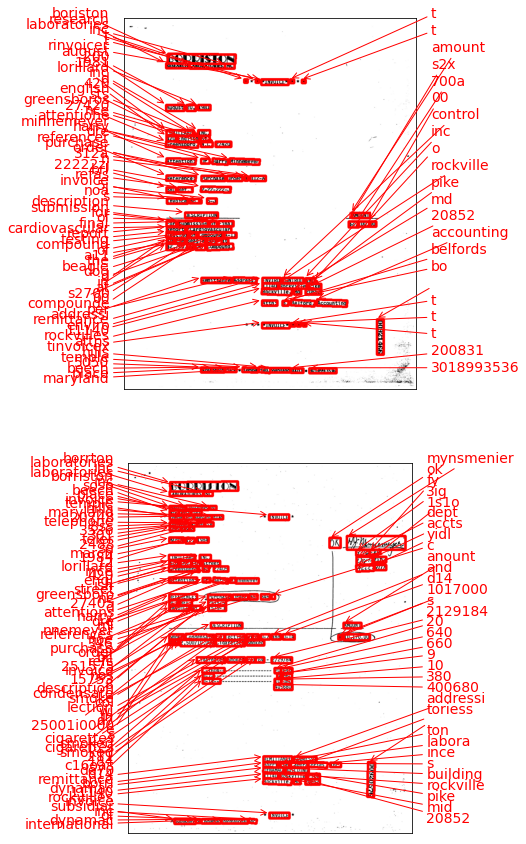

In [ ]:
fig, axs = plt.subplots(nrows=len(images), figsize=(15, 15))
if(len(list_image) == 1):
  for image, prediction in zip(images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=axs)
else:
  for ax, image, prediction in zip(axs, images, predictions):
    keras_ocr.tools.drawAnnotations(image=image, predictions=prediction, ax=ax)

In [ ]:
with open('results.txt', 'a+') as f:
  for idx, prediction in enumerate(predictions):
    if(idx != 0):
      print("\n")
      f.write("\n\n")
    print("Results for the file: " + os.path.basename(list_image[idx]))
    f.write("Results for the file: " + os.path.basename(list_image[idx]) + ":\n\n")
    for word, array in prediction:
      if word == "\n":
        print("\n")
        f.write("\n")
      else:
        print(word,  end = ' ')
        f.write(word + " ")

Results for the file: 00921466.tif
boriston research laboratories inc t t rinvoicer t t august 200 1981 lorillard inc d 420 english sts greensboros 27420 nce attentione dre harry minnemeyer referencer purchase order 312a h 22222zj brl refas invoice 5j noa s description amount for submission of final s2x 700a 00 cardiovascular report testing of compound a11 the beagle d in dog at s2700 00 compounde per remittance addressi enviro control inc o 11140 rockville pike rockvilles md 20852 attns belfords accounting bo  tinvoicex t t t 5050 beech place temple hills maryland 200831 3018993536 

Results for the file: 00920576.tif
borrton laboratories inc borriston laboratories inc soso beech place invoice temple hills maryland 20748 telephone 8ss 3536 301 teler 2488 sa mynsmenier march 1984 12 ok fy 3ig lorillard ince 1s1o dept 420 engl ish street accts yidl greensboro nc 27405 d attentions dre harry mi nnemeyer references noe 346 purchase order c bli refs 251575 invoice nos 15753 8 description a

In [ ]:
from google.colab import files

files.download("results.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2. Apply Image Preprocessing

In [ ]:
import cv2 as cv
import numpy as np
from PIL.Image import fromarray
from IPython.display import display 

show = lambda x: display(fromarray(x))

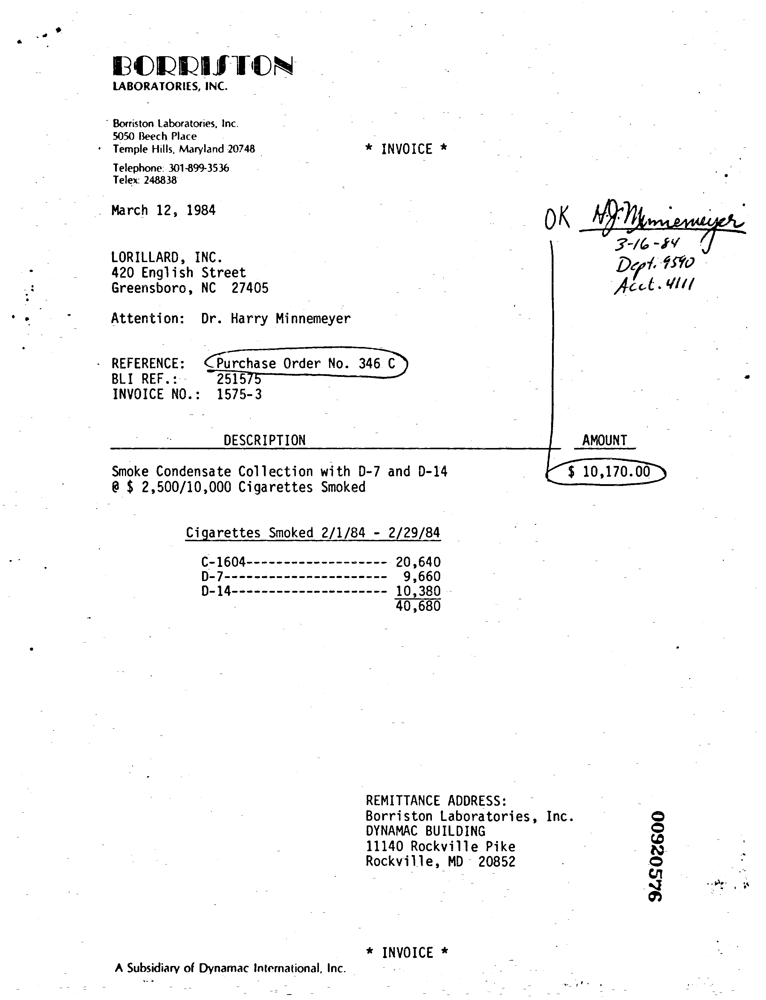

In [ ]:
# read image
image = cv.imread("/content/00920576.tif")

show(image)

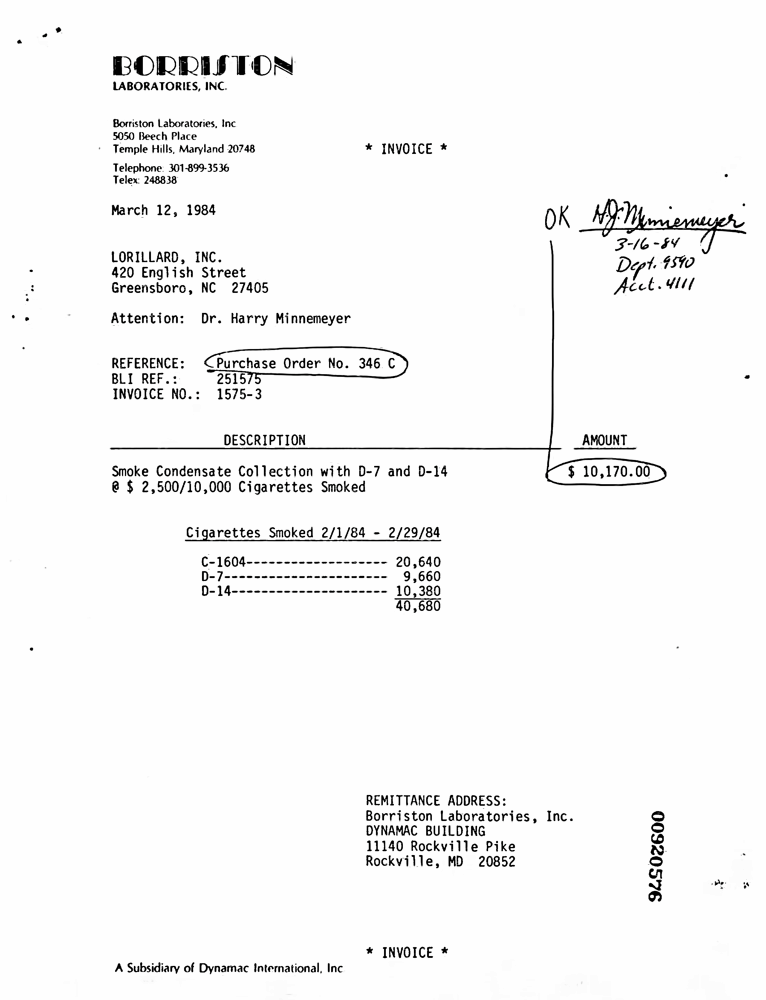

In [ ]:
denoised_image = cv.fastNlMeansDenoisingColored(image, None, 15, 10, 9, 21)
show(denoised_image)

# 3. Apply Text Post Processing

In [ ]:
from textblob import TextBlob

In [ ]:
def normalize_text(word_tokenize):
  """
  params:
    - word_tokenize
  methods:
    - remove short word {word > 1}
    - remove symbol
    - ignore numerical word
  output:
    - concatenated text
  """
  text = []
  for word in word_tokenize:
    if len(word) > 1:
      if word.isnumeric():
        text.append(word)
      elif word.isalnum():
        text.append(word)
      else:
        pass 
  result = " ".join(text)
  result = str(TextBlob(result).correct()) 
  return result

In [ ]:
sample_text = [word for word, array in predictions[0]]
print(" ".join(sample_text))

boriston research laboratories inc t t rinvoicer t t august 200 1981 lorillard inc d 420 english sts greensboros 27420 nce attentione dre harry minnemeyer referencer purchase order 312a h 22222zj brl refas invoice 5j noa s description amount for submission of final s2x 700a 00 cardiovascular report testing of compound a11 the beagle d in dog at s2700 00 compounde per remittance addressi enviro control inc o 11140 rockville pike rockvilles md 20852 attns belfords accounting bo  tinvoicex t t t 5050 beech place temple hills maryland 200831 3018993536


In [ ]:
clean_text = normalize_text(sample_text)
print(clean_text)

boston research laboratories in rinvoicer august 200 1981 lorillard in 420 english its greensboros 27420 once attention are harry minnemeyer reference purchase order 312a 22222zj bal read voice j not description amount for submission of final six 700a 00 cardiovascular report testing of compound and the eagle in dog at s2700 00 compound per resistance address entire control in 11140 rockville pike rockvilles md 20852 acts bedford accounting to tinvoicex 5050 beech place temple hills maryland 200831 3018993536
